In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
#read data
airports = pd.read_csv("airports.csv") #airport variables
carriers = pd.read_csv("carriers.csv") #carrier variables
plane_data = pd.read_csv("plane-data.csv") #airplane variables
dataframe1 = pd.read_csv("2007.csv") #import data for year 2007


In [3]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [4]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [5]:
dataframe1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [6]:
dataframe1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
dataframe1.shape

(7453215, 29)

In [8]:
airports.shape

(3376, 7)

In [9]:
carriers.shape

(1491, 2)

In [10]:
dataframe1.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [11]:
airports.isnull().sum()

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

<AxesSubplot:>

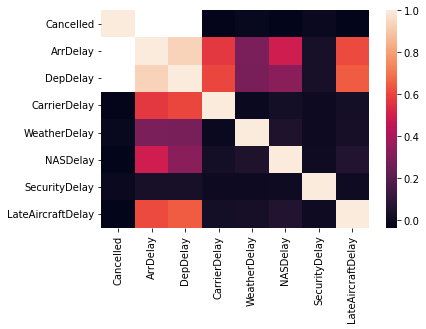

In [12]:
#check for correlation between cancalation and delays 

#select columns of interest
cancel=dataframe1[['Cancelled','CancellationCode','ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

#correlation heatmap (check how cancelations are correlated to delays)
cancel_heatm = sns.heatmap(cancel.corr()) #plot the heatmap
cancel_heatm

In [13]:
#the heatmap suggest a very strong correlation

#narrow in on the issue
cancel2 = cancel[['Cancelled','CancellationCode','ArrDelay','DepDelay']]
cancel2=cancel2[cancel2['Cancelled']==1] #  select only cancelled flights

#explore cancelation data
print(cancel2)
print(cancel2.isna().sum()) #sum of NA's

         Cancelled CancellationCode  ArrDelay  DepDelay
38               1                A       NaN       NaN
325              1                A       NaN       NaN
828              1                A       NaN       NaN
847              1                A       NaN       NaN
851              1                A       NaN       NaN
...            ...              ...       ...       ...
7453123          1                B       NaN       NaN
7453124          1                B       NaN       NaN
7453130          1                B       NaN       NaN
7453131          1                B       NaN       NaN
7453199          1                B       NaN       NaN

[160748 rows x 4 columns]
Cancelled                0
CancellationCode         0
ArrDelay            160748
DepDelay            160748
dtype: int64


In [14]:
#dataframe without cancelled flights.
dataframe1=dataframe1[dataframe1['Cancelled']==0] 


#Similarly if a plane is diverted, then arrival delay entry should be impossible.
#remaining NA values corresponds to diverted in the same way as cancelled.
print(dataframe1.ArrDelay.isna().sum()) #sum of NA's
print(dataframe1.DepDelay.isna().sum()) #sum of NA's


17179
0


In [15]:
#again we see a very strong correlation. so we select non-diverted flights.

#dataframes without diverted flights.
dataframe1=dataframe1[dataframe1['Diverted']==0] 


#if our assumption regarding diverted is true, NA's should excluded from ArrDelay and DepDelay
print(dataframe1.ArrDelay.isna().sum()) #sum of NA's
print(dataframe1.DepDelay.isna().sum()) #sum of NA's


0
0


In [16]:
dataframe1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [17]:
dataframe1.shape

(7275288, 29)

In [18]:
#merge df with carrier variables to get names of airlines
dataframe1 = pd.merge(dataframe1, carriers,  how='inner', left_on=['UniqueCarrier'], right_on = ['Code'])

#rename Description column to Carrier
dataframe1.rename(columns={'Description': 'Carrier'}, inplace=True)

#create columns
dataframe1['delay'] = ((dataframe1['DepDelay'])+(dataframe1['ArrDelay'])) #total delay column for a flight (Departure + Arrival delay)
dataframe1['dep_hour_standard'] = dataframe1['DepTime']/100*1.0386100 #departure standard time column
dataframe1['Date']= pd.to_datetime(pd.DataFrame({'year':dataframe1['Year'],
                                         'month':dataframe1['Month'],'day':dataframe1['DayofMonth'], 
                                         'hour':dataframe1['dep_hour_standard']})) #date column

dataframe1['dep_hour_int'] = (dataframe1['DepTime']/100).astype(int) #departure time column (in integer)
dataframe1['Date_bin']= pd.to_datetime(pd.DataFrame({'year':dataframe1['Year'],
                                             'month':dataframe1['Month'],'day':dataframe1['DayofMonth'], 
                                             'hour':dataframe1['dep_hour_int']})) #date column in bins

dataframe1.head() #explore new columns

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,0,0,0,WN,Southwest Airlines Co.,8.0,12.795675,2007-01-01 12:47:44.430720,12,2007-01-01 12:00:00
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,0,0,0,WN,Southwest Airlines Co.,21.0,19.920540,2007-01-01 19:55:13.943280,19,2007-01-01 19:00:00
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,0,0,31,WN,Southwest Airlines Co.,70.0,22.911737,2007-01-01 22:54:42.251760,22,2007-01-01 22:00:00
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,0,0,3,WN,Southwest Airlines Co.,56.0,12.774903,2007-01-01 12:46:29.650800,12,2007-01-01 12:00:00
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,0,0,0,WN,Southwest Airlines Co.,-2.0,8.630849,2007-01-01 08:37:51.056760,8,2007-01-01 08:00:00


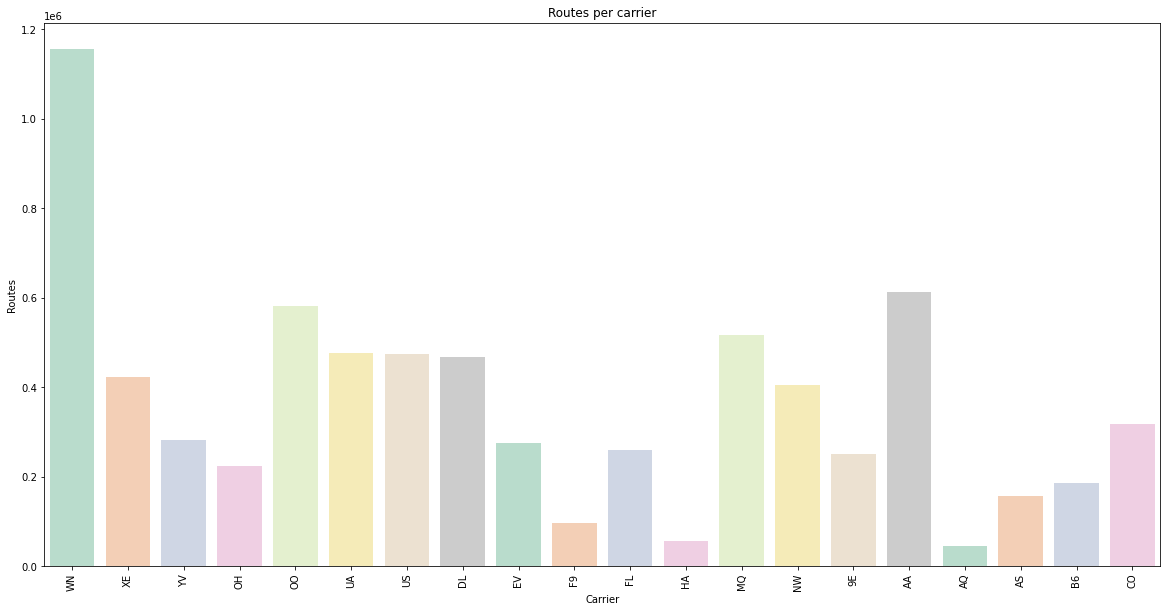

In [19]:
import seaborn as sns
sns.countplot(x='UniqueCarrier', palette="Pastel2", data=dataframe1)
plt.gcf().set_size_inches(20,10)
plt.title('Routes per carrier')
plt.xlabel('Carrier')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

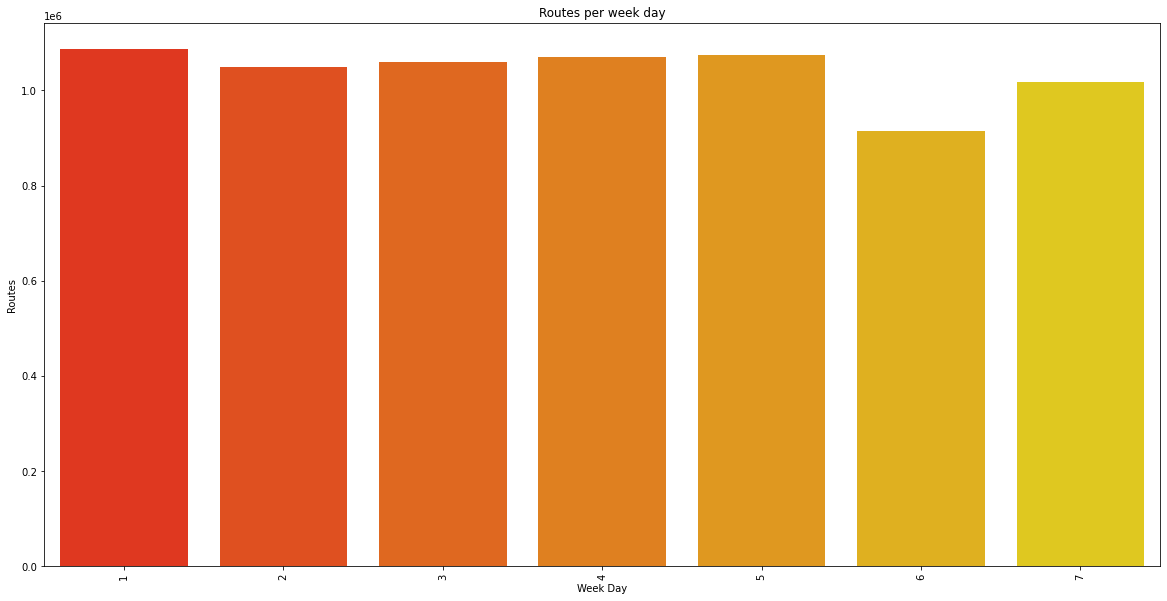

In [20]:
sns.countplot(x='DayOfWeek', palette="autumn", data=dataframe1)
plt.gcf().set_size_inches(20,10)
plt.title('Routes per week day')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

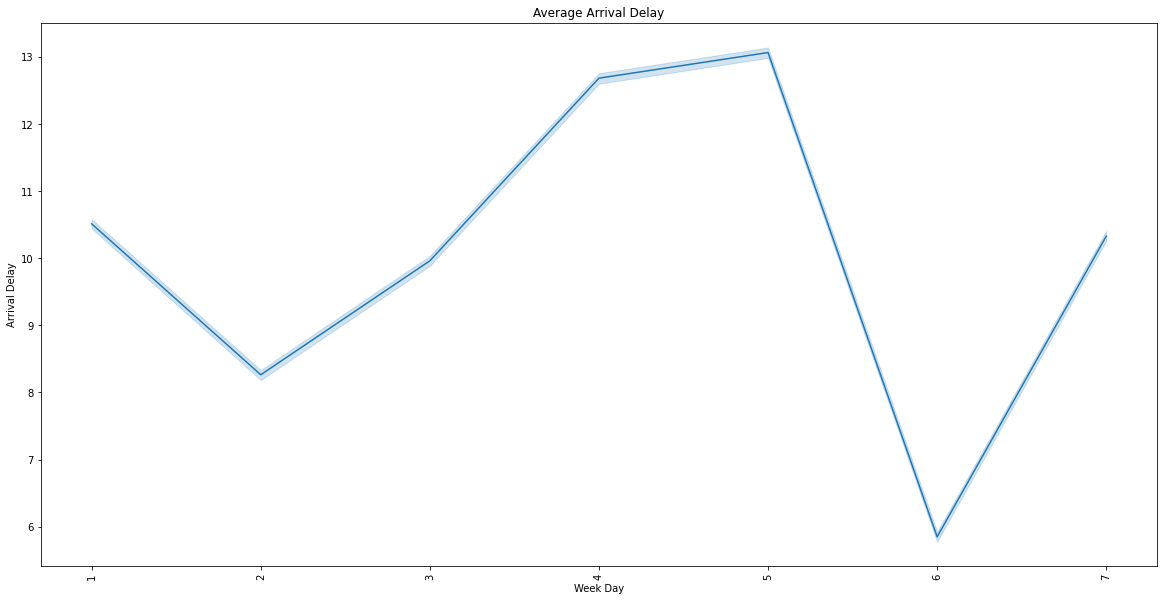

In [21]:
sns.lineplot(data=dataframe1, x = dataframe1['DayOfWeek'], y = dataframe1['ArrDelay'])
plt.gcf().set_size_inches(20,10)
plt.title('Average Arrival Delay')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Arrival Delay')
plt.show()

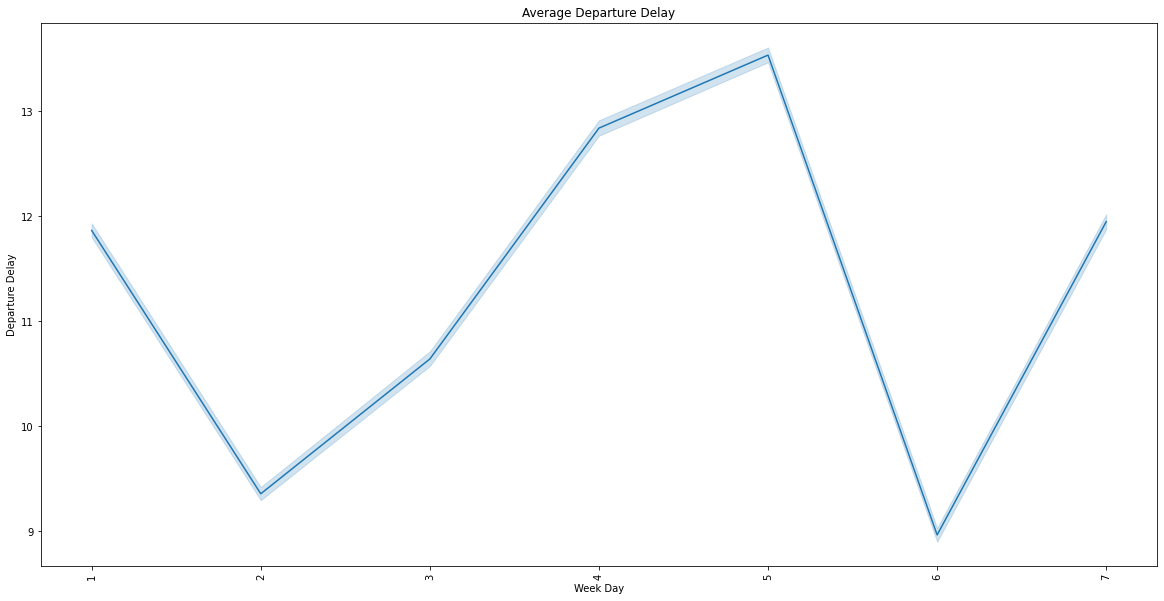

In [22]:
sns.lineplot(data=dataframe1, x = dataframe1['DayOfWeek'], y = dataframe1['DepDelay'])
plt.gcf().set_size_inches(20,10)
plt.title('Average Departure Delay')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Departure Delay')
plt.show()

In [23]:
delay_carrier=dataframe1[['Carrier']].groupby("Carrier").count() #carrier column and group by count
delay_carrier['fligts']=dataframe1['Carrier'].value_counts() #total flights
delay_carrier = delay_carrier.reset_index(drop=False) #reset index

#carrier total delays df
delay_carrier2=(dataframe1[dataframe1['delay']>0]['Carrier'].value_counts()) #delayed
delay_carrier2=delay_carrier2.to_frame(name=('total delays')) #to df
delay_carrier2.index.name='Carrier' #set index name
delay_carrier2=delay_carrier2.reset_index(drop=False) #reset index

#merge to carrier delay df
delay_merge = delay_carrier.merge(delay_carrier2[['Carrier','total delays']],
                                  how='left',left_on='Carrier',right_on='Carrier')
delay_merge['percentage']=(delay_merge['total delays']/delay_merge['fligts']) #% delay column
delay_merge #explore new df

,Carrier,fligts,total delays,percentage
0,AirTran Airways Corporation,259869,112512,0.432957
1,Alaska Airlines Inc.,157123,75635,0.481374
2,Aloha Airlines Inc.,45957,12260,0.266771
3,American Airlines Inc.,613836,312716,0.509446
4,American Eagle Airlines Inc.,516205,246268,0.477074
5,Atlantic Southeast Airlines,276617,158313,0.572318
6,Comair Inc.,224471,118403,0.527476
7,Continental Air Lines Inc.,319138,144878,0.453967
8,Delta Air Lines Inc.,468323,212794,0.454374
9,Expressjet Airlines Inc.,422305,175299,0.415100


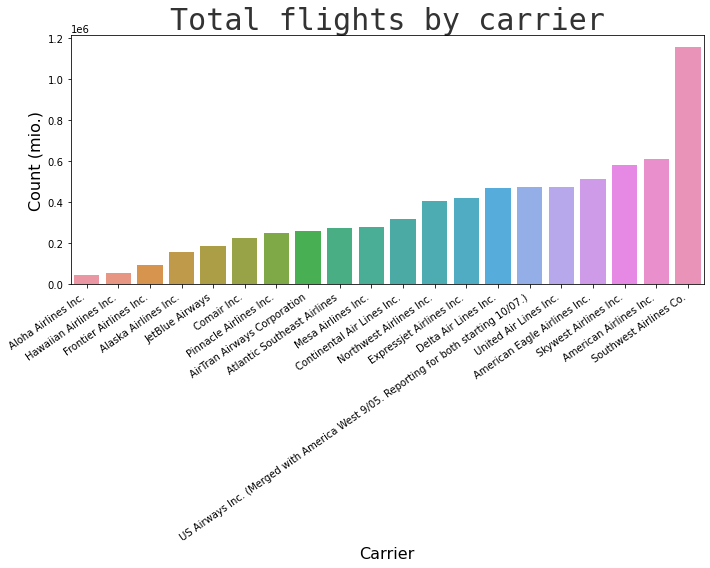

In [24]:

#plot total flights by carrier (should show that Hawaiian has way less flights than big carriers)
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_merge.sort_values(by='fligts'),ax=ax, x=('Carrier'), y=('fligts'))
ax.set_title('Total flights by carrier',fontsize = 30, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Carrier',fontsize = 16)
ax.set_ylabel("Count (mio.)",fontsize = 16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('EDA_plot4.png', bbox_inches='tight') #save img
plt.show() #plot

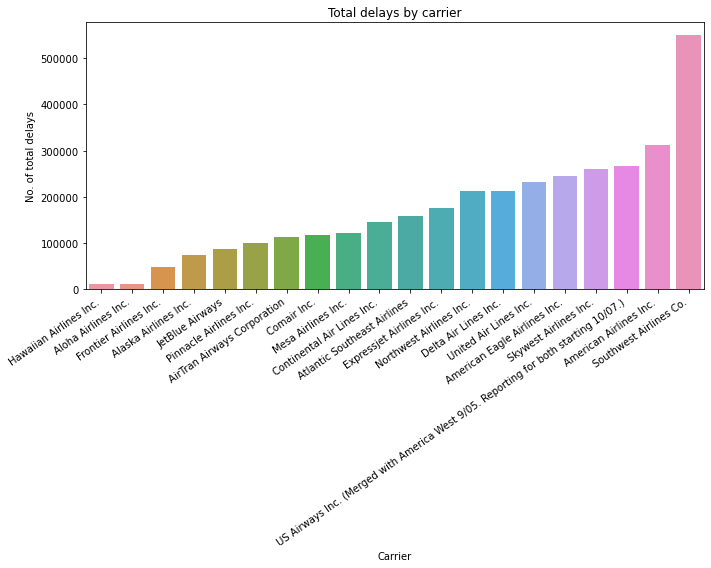

In [25]:
#plot total delays by carrier
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_merge.sort_values(by='total delays'),ax=ax, x=('Carrier'), y=('total delays'))
ax.set_title('Total delays by carrier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Carrier')
ax.set_ylabel('No. of total delays')
plt.tight_layout() #tight layout
plt.show() #plot

# Questions

**When is the best day of the week to fly to minimise delays?**

In [26]:
#average delay in minutes by weekday (departure, arrival, and total delay)

# #map days
dataframe1['DayOfWeek'] = dataframe1['DayOfWeek'].replace({1:'Monday',2:'Tuesday',
                                        3:'Wednesday',4:'Thursday',5:'Friday',
                                       6:'Saturday',7:'Sunday'}) #weekname column  
#create df with average values
day_mean=dataframe1[['DayOfWeek','DepDelay','ArrDelay']].groupby(['DayOfWeek']).mean() #mean delay by day
day_mean['Avg. delay']=(day_mean['DepDelay']+day_mean['ArrDelay'])/2 #avg. delay column
day_mean['Total avg. delay']=(day_mean['DepDelay']+day_mean['ArrDelay']) #tot. delay column
day_mean=day_mean.sort_values(by='Avg. delay',ascending=True) #arrange by avg. delay

#export table to img
day_mean = day_mean.reset_index(drop=False)
day_mean.rename(columns={'DayOfWeek': 'Day of Week', 'DepDelay': 
                         'Avg. Departure Delay','ArrDelay':
                         'Avg. Arrival Delay'}, inplace=True) #rename columns
day_mean #explore

,Day of Week,Avg. Departure Delay,Avg. Arrival Delay,Avg. delay,Total avg. delay
0,Saturday,8.965287,5.846600,7.405944,14.811887
1,Tuesday,9.357214,8.263684,8.810449,17.620898
2,Wednesday,10.641332,9.962944,10.302138,20.604276
3,Sunday,11.949764,10.329577,11.139671,22.279342
4,Monday,11.865884,10.513503,11.189693,22.379386
5,Thursday,12.840758,12.685980,12.763369,25.526738
6,Friday,13.536223,13.067675,13.301949,26.603898


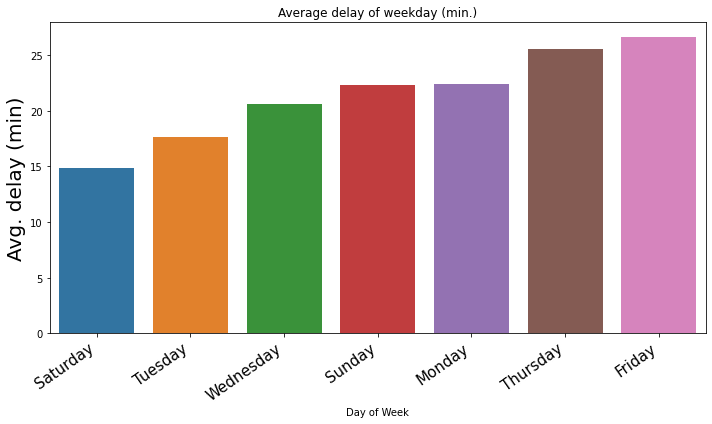

In [27]:
#plot bar chart mean delay delays total

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = day_mean.sort_values(by='Total avg. delay'), 
            ax=ax, x=('Day of Week'), y=('Total avg. delay'))

ax.set_title('Average delay of weekday (min.)') #title
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 15) #rotate xlabel
ax.set_ylabel('Avg. delay (min)', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout rect
plt.show() #plot

#### Most Popular Destination with Average Arrival Delays?


In [28]:
dataframe1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2007,1,1,Monday,1232.0,1225,1341.0,1340,WN,2891,...,0,0,0,WN,Southwest Airlines Co.,8.0,12.795675,2007-01-01 12:47:44.430720,12,2007-01-01 12:00:00
1,2007,1,1,Monday,1918.0,1905,2043.0,2035,WN,462,...,0,0,0,WN,Southwest Airlines Co.,21.0,19.920540,2007-01-01 19:55:13.943280,19,2007-01-01 19:00:00
2,2007,1,1,Monday,2206.0,2130,2334.0,2300,WN,1229,...,0,0,31,WN,Southwest Airlines Co.,70.0,22.911737,2007-01-01 22:54:42.251760,22,2007-01-01 22:00:00
3,2007,1,1,Monday,1230.0,1200,1356.0,1330,WN,1355,...,0,0,3,WN,Southwest Airlines Co.,56.0,12.774903,2007-01-01 12:46:29.650800,12,2007-01-01 12:00:00
4,2007,1,1,Monday,831.0,830,957.0,1000,WN,2278,...,0,0,0,WN,Southwest Airlines Co.,-2.0,8.630849,2007-01-01 08:37:51.056760,8,2007-01-01 08:00:00


In [29]:
dataframe1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Carrier', 'delay', 'dep_hour_standard', 'Date', 'dep_hour_int',
       'Date_bin'],
      dtype='object')

In [30]:
df2 = dataframe1[['Dest', 'ArrDelay']]
df2 = df2.groupby(['Dest']).mean().reset_index()
df2.head(10)

,Dest,ArrDelay
0,ABE,11.150372
1,ABI,16.964560
2,ABQ,7.387980
3,ABY,15.339314
4,ACK,29.289286
5,ACT,9.517626
6,ACV,15.302787
7,ACY,20.493431
8,ADK,12.010309
9,ADQ,4.568504


In [31]:
df2.shape

(304, 2)

In [32]:
df3 = dataframe1.Dest.value_counts().rename_axis('Dest').reset_index(name='FLIGHTS').iloc[0:30]
df3.head(30)

,Dest,FLIGHTS
0,ATL,404971
1,ORD,357261
2,DFW,285766
3,DEN,236342
4,LAX,234051
5,PHX,207724
6,IAH,197088
7,LAS,181833
8,DTW,172680
9,MSP,151574


In [33]:
question2_df= pd.merge(df2,df3, on='Dest')
question2_df.head()

,Dest,ArrDelay,FLIGHTS
0,ATL,9.878157,404971
1,BOS,11.493144,123842
2,BWI,7.698767,107578
3,CLE,9.908027,76762
4,CLT,10.226346,124579


In [34]:
question2_df.describe()

,ArrDelay,FLIGHTS
count,30.000000,30.000000
mean,10.284868,152475.033333
std,4.281720,81828.376852
min,5.282648,73933.000000
25%,7.367040,97437.750000
50%,9.837637,124210.500000
75%,11.396322,179544.750000
max,22.873215,404971.000000


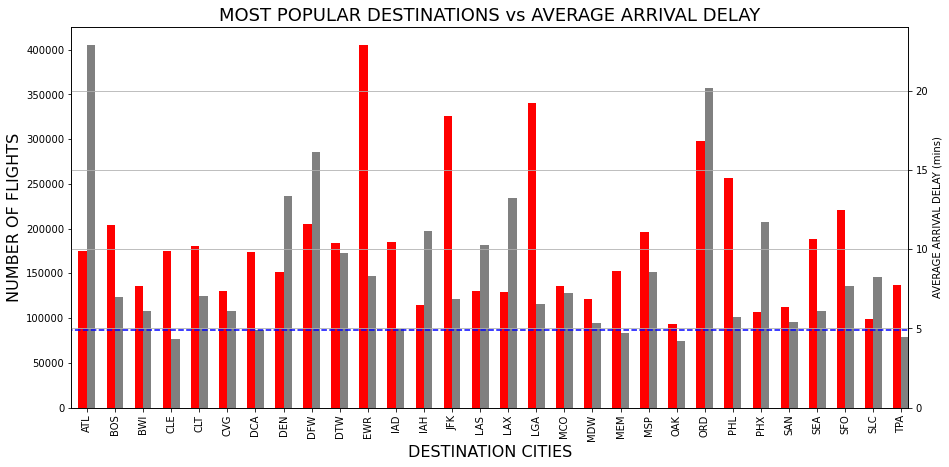

In [35]:
question2_df = question2_df.set_index('Dest')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

question2_df.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
question2_df.ArrDelay.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

The dashed line that you see on the plot corresponds to the average delay on arrival of the top 30 destinations. It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay with just over 10 minutes, whereas Newark, a not so popular destination, has such a high minute average delay. San Francisco is another destination that stands out with a high average delay as well as Orlando and New York

In [36]:
dataframe1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Carrier', 'delay', 'dep_hour_standard', 'Date', 'dep_hour_int',
       'Date_bin'],
      dtype='object')

### Is there a better day to travel?

In [37]:
dataframe1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2007,1,1,Monday,1232.0,1225,1341.0,1340,WN,2891,...,0,0,0,WN,Southwest Airlines Co.,8.0,12.795675,2007-01-01 12:47:44.430720,12,2007-01-01 12:00:00
1,2007,1,1,Monday,1918.0,1905,2043.0,2035,WN,462,...,0,0,0,WN,Southwest Airlines Co.,21.0,19.920540,2007-01-01 19:55:13.943280,19,2007-01-01 19:00:00
2,2007,1,1,Monday,2206.0,2130,2334.0,2300,WN,1229,...,0,0,31,WN,Southwest Airlines Co.,70.0,22.911737,2007-01-01 22:54:42.251760,22,2007-01-01 22:00:00
3,2007,1,1,Monday,1230.0,1200,1356.0,1330,WN,1355,...,0,0,3,WN,Southwest Airlines Co.,56.0,12.774903,2007-01-01 12:46:29.650800,12,2007-01-01 12:00:00
4,2007,1,1,Monday,831.0,830,957.0,1000,WN,2278,...,0,0,0,WN,Southwest Airlines Co.,-2.0,8.630849,2007-01-01 08:37:51.056760,8,2007-01-01 08:00:00


In [38]:
dataframe1.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Code', 'Carrier', 'delay', 'dep_hour_standard', 'Date', 'dep_hour_int',
       'Date_bin'],
      dtype='object')

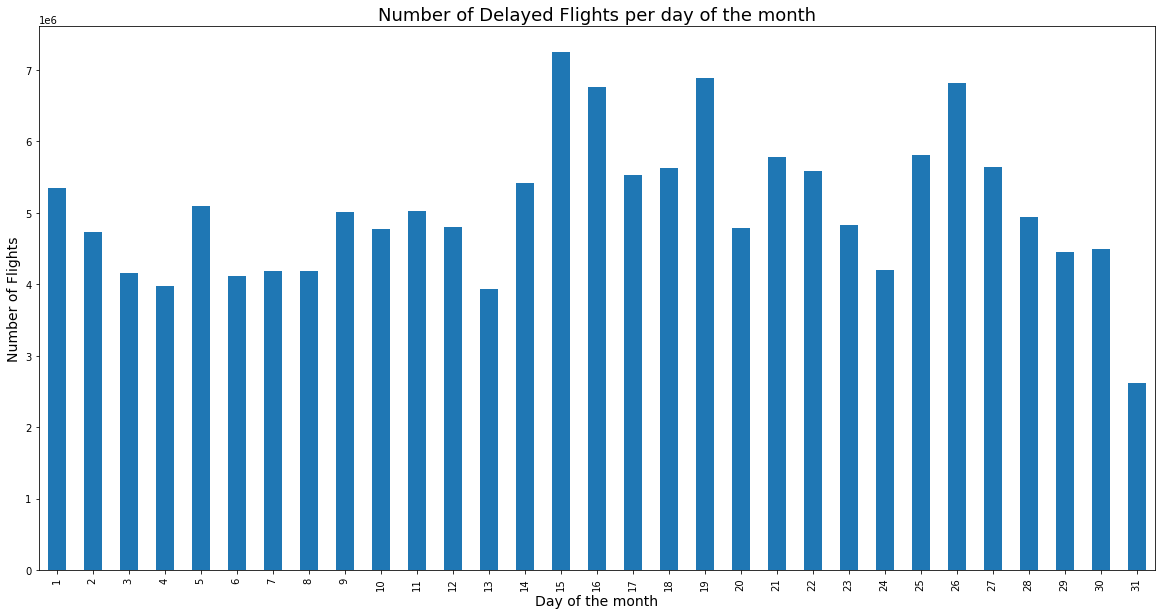

In [39]:
plt.figure(figsize=(20, 10))
dataframe1.groupby('DayofMonth').delay.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()


### Total Minutes Delayed by Airline?

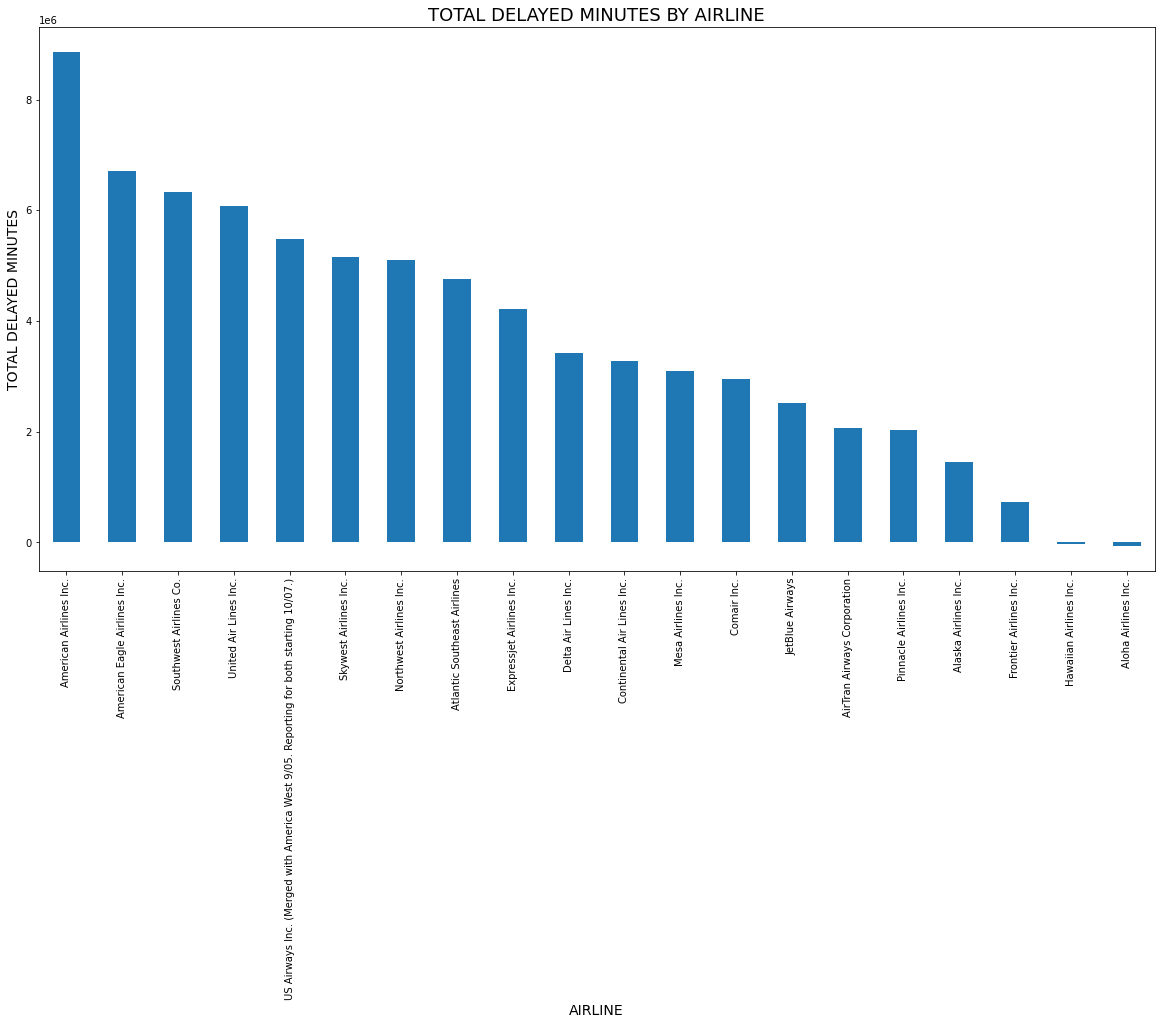

In [40]:
plt.figure(figsize=(20, 10))
dataframe1.groupby('Carrier').ArrDelay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

This is another interesting plot that reveals again something positive about Aloha Airlines. Even when it is at the top in terms of number of delayed flights, the total number of minutes delayed is the lowest of all. How come is it negative? because there are a lot of flights that arrive earlier than what was expected, and therefore the ARR_DELAY is a negative number instead of a positive one

In [41]:
#slect relevant columns & check for NA's
dataframe1 = dataframe1[['Month','DayOfWeek','DayofMonth','Origin','Dest','CRSDepTime','DepDelay','CRSArrTime','ArrDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','delay']]
dataframe1.isnull().sum()

Month                0
DayOfWeek            0
DayofMonth           0
Origin               0
Dest                 0
CRSDepTime           0
DepDelay             0
CRSArrTime           0
ArrDelay             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
delay                0
dtype: int64

<AxesSubplot:>

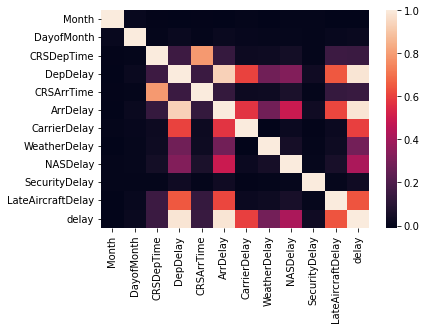

In [42]:
#correlation heatmap
import seaborn as sns #imports the seaborn library
sns.heatmap(dataframe1.corr()) #plot the heatmap

In [43]:
dataframe1['DayOfWeek'] = dataframe1['DayOfWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [44]:
dataframe1.columns

Index(['Month', 'DayOfWeek', 'DayofMonth', 'Origin', 'Dest', 'CRSDepTime',
       'DepDelay', 'CRSArrTime', 'ArrDelay', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'delay'],
      dtype='object')

In [45]:
#take a sample of the data (due to computational limitations)
dataframe1=dataframe1.sample(250000)

#dummies from orgigin and dest columns
dataframe1 = pd.get_dummies(dataframe1, columns=['Origin', 'Dest'])
dataframe1.head()

,Month,DayOfWeek,DayofMonth,CRSDepTime,DepDelay,CRSArrTime,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
3651766,1,3,10,1716,25.0,2035,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6754906,11,2,27,1410,7.0,1739,-2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5999939,1,6,20,730,-2.0,750,-3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4830058,2,3,7,905,-7.0,955,-6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7119105,7,2,3,630,-10.0,915,-11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#split into training and test set(80/20)
from sklearn.model_selection import train_test_split #import  function
X_train, X_test, y_train, y_test = train_test_split(dataframe1.drop('delay', axis=1), dataframe1['delay'], test_size=0.2, random_state=42)